<a href="https://colab.research.google.com/github/JardielmaQueiroz/Projeto_de_diplomacao/blob/main/credit_fraud_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3 align="center"> Detecção de fraudes em cartões de crédito utilizando técnicas de Aprendizado de Máquina </h3>





**Aluna:** Jardielma Queiroz De Lima

**Orientadora:** Prof.a Dr.a Kelly Assis de Souza Gazolli

## 1.1 Importação da Bibliotecas

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Importação das bibliotecas
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, average_precision_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

 # 1.2 Leitura do dados

* [Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud)

In [4]:
#arquivo = './dataBase/creditcard.csv'
arquivo = r'/content/drive/MyDrive/dataBase/creditcard.csv'
df = pd.read_csv(arquivo, low_memory=False)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# 2. Análise dos Dados

- Mostrar distribuição das transações normais e anômalas;
- criar uma série de histogramas de frequência para os atributos (V1 - V28) do conjunto de dados. Posteriormente, analisaremos separadamente: Classe, Tempo e montante;
- Calculo estatístico básico do dados.

## 2.1. Distribuição dos dados por class

Não Fraudes correponde a 99.83 % do conjunto de dados
Fraudes correponde a 0.17 % do conjunto de dados


Text(0.5, 0, '0: Não-Fraude  1:Fraude')

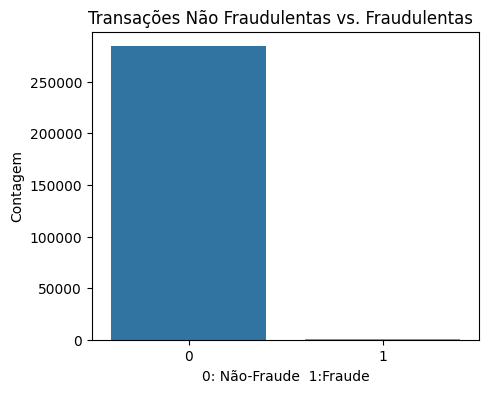

In [ ]:
print('Não Fraudes correponde a', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% do conjunto de dados')
print('Fraudes correponde a', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% do conjunto de dados')

#Mostrando a Distribuição dos dados agrupados por class:
counts = df['Class'].value_counts()

plt.style.use('default')
plt.figure(figsize=(5,4))
sns.barplot(x=counts.index, y=counts)
plt.title('Transações Não Fraudulentas vs. Fraudulentas  ')
plt.ylabel('Contagem')
plt.xlabel('0: Não-Fraude  1:Fraude')

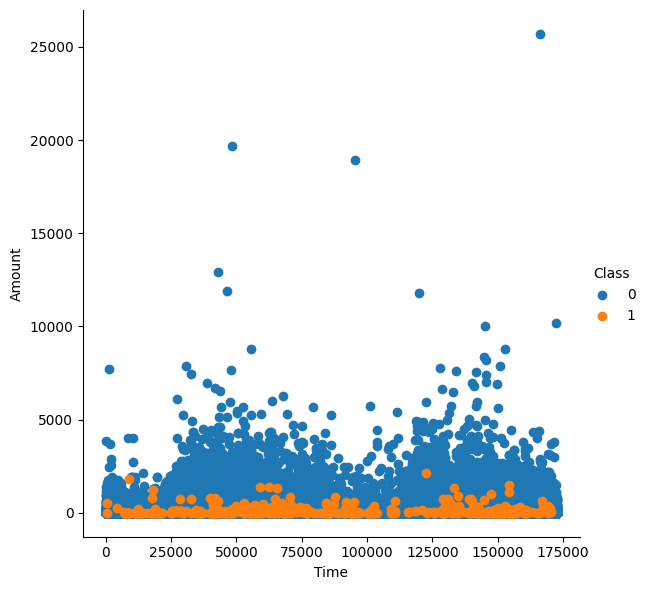

Text(0.5, 0.98, 'Distribuição do valor das transação ao longo do tempo')

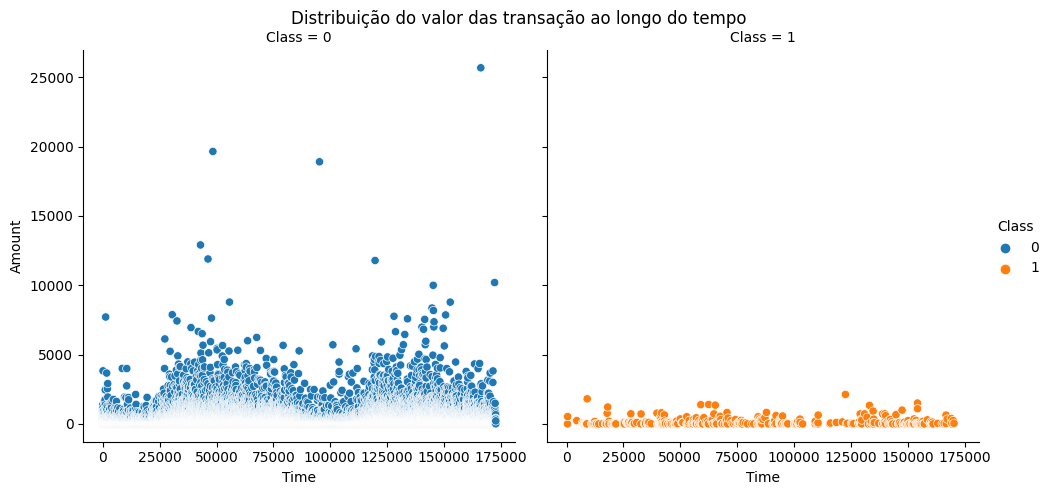

In [ ]:
#Distribuição dos valores de transações
sns.FacetGrid(df, hue="Class", size = 6).map(plt.scatter, "Time", "Amount").add_legend()
plt.show()

x = df['Time']
y = df['Amount']
rp = sns.relplot(data=df, x=x, y=y, col="Class", kind="scatter", hue="Class")
rp.fig.subplots_adjust(top=0.9)
rp.fig.suptitle('Distribuição do valor das transação ao longo do tempo')

## 2.2. Comparação estátistica em função do tempo e montante

In [ ]:
#Função destinada a fazer a comparação estátistica básica por atribuito do conjunto de dados:
def compare_leg_fraud(attribute):
    leg_trS = df.loc[df["Class"] == 0][attribute].rename("Trasação Legítima").describe()
    frd_trS = df.loc[df["Class"] == 1][attribute].rename("Transação Fraudulenta").describe()
    tr_hourDF = leg_trS.to_frame().join(frd_trS.to_frame())
    return tr_hourDF

#Análise estátistica com base no tempo    
compare_leg_fraud("Time")

,Trasação Legítima,Transação Fraudulenta
count,284315.000000,492.000000
mean,94838.202258,80746.806911
std,47484.015786,47835.365138
min,0.000000,406.000000
25%,54230.000000,41241.500000
50%,84711.000000,75568.500000
75%,139333.000000,128483.000000
max,172792.000000,170348.000000


In [ ]:
#Análise estátistica com base no montante    
compare_leg_fraud("Amount")

,Trasação Legítima,Transação Fraudulenta
count,284315.000000,492.000000
mean,88.291022,122.211321
std,250.105092,256.683288
min,0.000000,0.000000
25%,5.650000,1.000000
50%,22.000000,9.250000
75%,77.050000,105.890000
max,25691.160000,2125.870000


In [ ]:
#Calcular o valor médio das transações Não-Fraudulentas
(df.loc[df["Class"] == 0]["Amount"].value_counts(normalize=True)*100).head().to_frame()

,Amount
1.00,4.774634
1.98,2.125811
0.89,1.713592
9.99,1.669275
15.00,1.153650


In [ ]:
#Calcular o valor médio das transações Fraudulentas
(df.loc[df["Class"] == 1]["Amount"].value_counts(normalize=True)*100).head().to_frame()

,Amount
1.00,22.967480
0.00,5.487805
99.99,5.487805
0.76,3.455285
0.77,2.032520


Após verificação dos dados é possível identificar que quase 23% de todas as transações fraudulentas somam 1.0, onde a porcentagem para o mesmo valor de transação no conjunto legítimo é mais próxima de 5%. Também vemos um grande número de transações de valor 0, que provavelmente é o resultado de transações de verificação de detalhes do titular do cartão.

# 3. Processamento de dados

In [5]:
#Separando os dados por classe:
non_fraudes = df.loc[df['Class'] == 0] #Número de transações válidas
fraudes = df.loc[df['Class'] == 1] #Número de transações fraudulentas 

#Calcular taxa de anomalia:
contamination = len(fraudes)/float(len(non_fraudes))

#Mostrar quantidade transações: válidas, normais e taxa de anomalia 
print('Transações Normais: %i' % len(non_fraudes))
print('Trasações Fraudulentas: %i' % len(fraudes))
print('Taxa de anomalia: %f' % contamination)

Transações Normais: 284315
Trasações Fraudulentas: 492
Taxa de anomalia: 0.001730


In [6]:
#Separar o conjunto em dados e classe para treino e teste:
dados_train = non_fraudes.iloc[:,:-1]  #Entrada 
classes_train = non_fraudes['Class'] #Saída

X_outliers = fraudes.iloc[:,:-1]  #Entrada
y_outliers = fraudes['Class'] #Saída

#Separar o conjunto de dados da classe majoritária para teste e treinamento - (70% treinamento) e (30% teste)
#Apenas a transações válidas são utilizadas para treinar o modelo *
X_train, X_test, y_train, y_test = train_test_split(dados_train, classes_train, test_size=0.30, random_state=42)

print("Tamanho do conjunto de treinamento:", X_train.shape)
print("Tamanho do conjunto de teste - Não Fraude:", X_test.shape)
print("Tamanho do conjunto de teste - Fraude:", X_outliers.shape)

#Junta os dados de teste:
X_test = np.append(X_test , X_outliers,axis=0)
y_test = np.append(y_test , y_outliers,axis=0)

print("Tamanho do novo conjunto de teste:", X_test.shape)

Tamanho do conjunto de treinamento: (199020, 30)
Tamanho do conjunto de teste - Não Fraude: (85295, 30)
Tamanho do conjunto de teste - Fraude: (492, 30)
Tamanho do novo conjunto de teste: (85787, 30)


# 5. Treinar Modelos

###### **5.1 - Funções para medir performace do modelo**




In [7]:
def medir_performace(predicao, y):
    #Calcula quantidade de erros:
    erros = medir_taxaErro(y, predicao)  
    
    #Iprime as metricas
    print(classification_report(y, predicao))
    print('Número total de erros: %i' % erros) 
    print('Accuracy: %.3f' % accuracy_score(y, predicao))
    print('f1_score: %.3f' % f1_score(y, predicao))
    print('Precisão: %.3f' % precision_score(y, predicao))
    print('Recall: %.3f' % recall_score(y, predicao))
    print("Model ROC:", roc_auc_score(y,predicao))
    
    #Imprime grafico - Matriz confusão
    matrix = confusion_matrix(y,predicao)
    sns.heatmap(pd.DataFrame(matrix, columns = ['Atual', 'Predição']),
                xticklabels=['Não Fraude [0]', 'Fraude [1]'], 
                yticklabels=['Não Farude [0]', 'Fraude [1]'], 
                annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
    plt.xlabel('Valor Predito')
    plt.ylabel('Valor Real')
        
def medir_taxaErro(y, predicao):
    # As transações válidas são rotuladas como 0.
    predicao[predicao == 1] = 0 
    
    # As transações fraudulentas são rotuladas como 1. 
    predicao[predicao == -1] = 1 

    # Número total de erros é calculado. 
    taxa_error = (predicao != y).sum() 

    return  taxa_error

def graph_roc_curve(log_fpr, log_tpr, y_train_, log_pred, model_name):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve', fontsize=18)
    plt.plot(log_fpr, log_tpr, label= model_name +' Score: {:.4f}'.format(roc_auc_score(y_train_, log_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('Taxa de Falsos Positivos', fontsize=12)
    plt.ylabel('Taxa de Verdadeiro Positivo', fontsize=12)
    plt.legend()


##### **5.2 - Model Isolation Forest**

Como os rótulos foram fornecidos no conjunto de dados, então os mesmos foram utilizados para encontrar o desempenho do modelo. Então, aqui vamos tentar usar o algoritmo Isolation Forest supervisionado (usando rótulos). No entanto, uma coisa a ter em mente é que todos os algoritmos de detecção de anomalias são inerentemente destinados ao uso no sentido não supervisionado.

###### **5.2.1 - IForest (Padrão)**

Model Isolation Forest 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.50      0.26      0.34       492

    accuracy                           0.99     85787
   macro avg       0.75      0.63      0.67     85787
weighted avg       0.99      0.99      0.99     85787

Número total de erros: 492
Accuracy: 0.994
f1_score: 0.342
Precisão: 0.500
Recall: 0.260
Model ROC: 0.6293309637475295


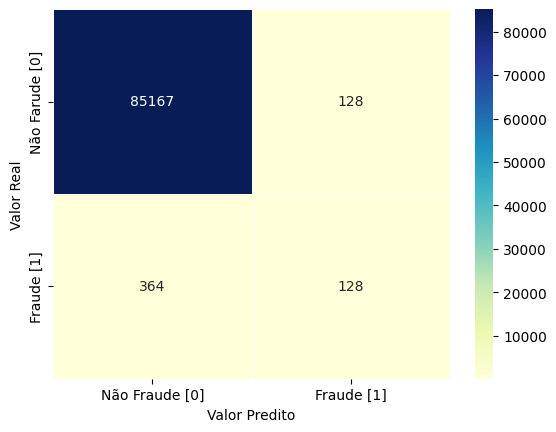

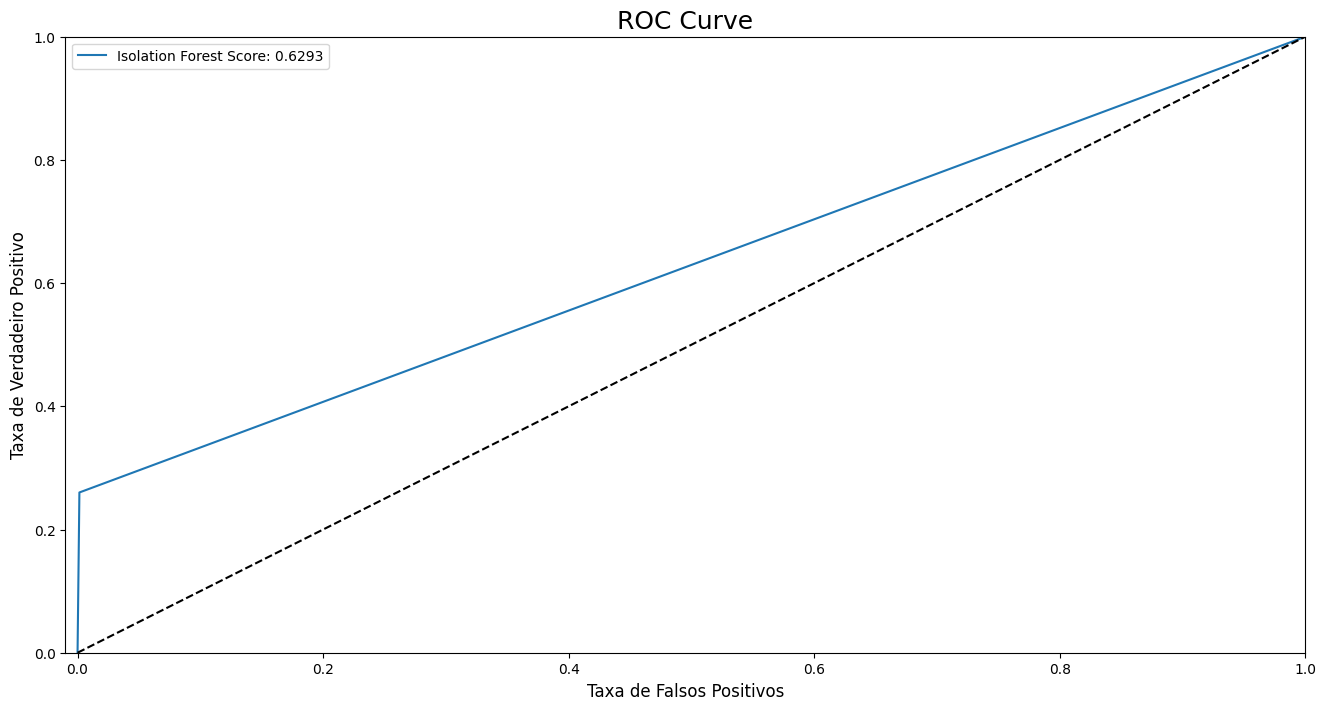

In [ ]:
#Treinar modelo Iforest
clf = IsolationForest(n_estimators=100, contamination=contamination, random_state=42)
clf.fit(X_train)
pred_iforest = clf.predict(X_test)

# Avaliar desempenho dos modelos
model_name = 'Isolation Forest'
print(f'Model {model_name} ')

medir_performace(pred_iforest,y_test)

log_fpr, log_tpr, log_thresold = roc_curve(y_test, pred_iforest)
graph_roc_curve(log_fpr, log_tpr, y_test, pred_iforest, model_name)

###### **5.2.2 - IForest (Ajustado)**

Best: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_contamination,param_max_features,param_max_samples,param_n_estimators,param_n_jobs,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,3.277305,0.359440,1.161720,0.005442,True,0.1,5,100,100,5,"{'bootstrap': True, 'contamination': 0.1, 'max...",0.0,0.0,0.0,0.0,0.0,1
1,3.336692,0.489594,1.170395,0.011155,True,0.1,5,100,100,10,"{'bootstrap': True, 'contamination': 0.1, 'max...",0.0,0.0,0.0,0.0,0.0,1
2,3.349704,0.231179,1.155381,0.004718,True,0.1,5,100,100,20,"{'bootstrap': True, 'contamination': 0.1, 'max...",0.0,0.0,0.0,0.0,0.0,1
3,3.344366,0.122010,1.160719,0.014627,True,0.1,5,100,100,30,"{'bootstrap': True, 'contamination': 0.1, 'max...",0.0,0.0,0.0,0.0,0.0,1
4,6.163256,0.665535,2.323440,0.021534,True,0.1,5,100,200,5,"{'bootstrap': True, 'contamination': 0.1, 'max...",0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,4.754645,0.195769,1.704212,0.010508,False,0.00173,15,200,100,30,"{'bootstrap': False, 'contamination': 0.001730...",0.0,0.0,0.0,0.0,0.0,1
572,9.048873,0.594037,3.369389,0.022902,False,0.00173,15,200,200,5,"{'bootstrap': False, 'contamination': 0.001730...",0.0,0.0,0.0,0.0,0.0,1
573,9.025185,0.530026,3.365052,0.002162,False,0.00173,15,200,200,10,"{'bootstrap': False, 'contamination': 0.001730...",0.0,0.0,0.0,0.0,0.0,1
574,9.086240,0.243685,3.368722,0.034453,False,0.00173,15,200,200,20,"{'bootstrap': False, 'contamination': 0.001730...",0.0,0.0,0.0,0.0,0.0,1


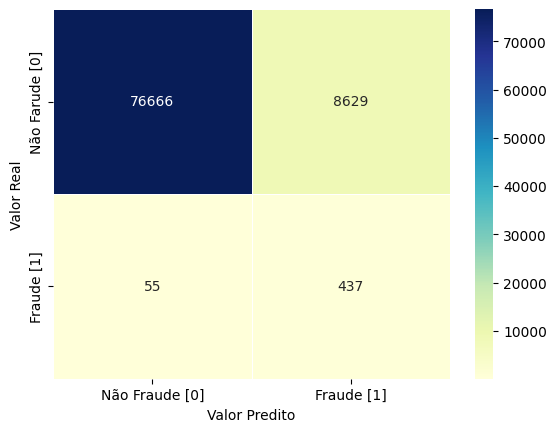

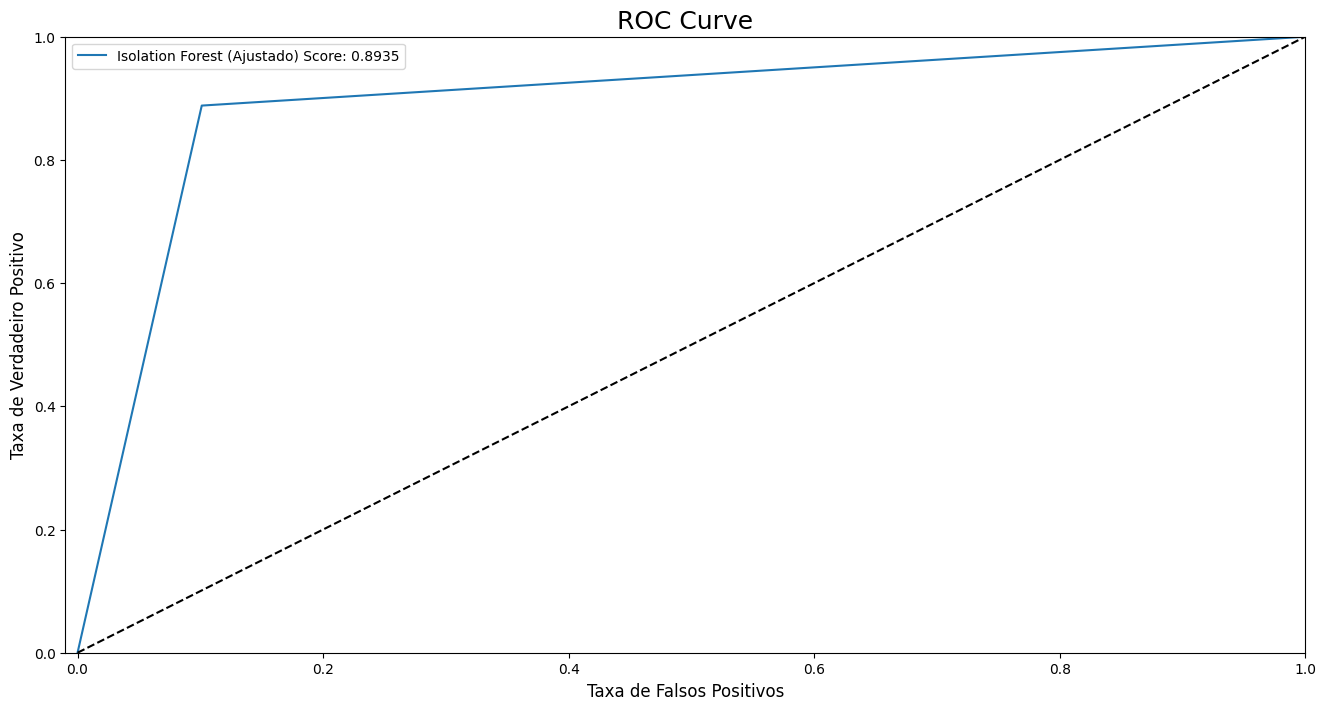

In [ ]:
#Declaração de variáveis:
list_desempenho = []

# Definir hiperparametros
parametros_grid = {'n_estimators': list(range(100, 300, 100)), 
              'max_samples': list(range(100, 300, 100)), 
              'contamination': [0.1, 0.2, 0.3, 0.4, 0.5, len(fraudes)/float(len(non_fraudes))], 
              'max_features': [5,10,15], 
              'bootstrap': [True, False], 
              'n_jobs': [5, 10, 20, 30]}

#instancia o modelo
modelo_isf = IsolationForest(random_state=42)

#Definir f1_scorer
f1sc = make_scorer(f1_score, average='macro')

#Selecionar melhores parametros para o modelo
grid = GridSearchCV(estimator=modelo_isf, param_grid=parametros_grid, cv=3, scoring=f1sc)
grid_results = grid.fit(X_train, y_train)

#Resumo dos resultados
print("Best: {0}, using {1}".format(grid_results.cv_results_['mean_test_score'], grid_results.best_params_))
results_df = pd.DataFrame(grid_results.cv_results_)

#Previsão com o melhor modelo
melhor_modelo = grid_results.best_estimator_
pred_iforest = melhor_modelo.predict(X_test)

#Avaliar desempenho dos modelos
model_name = 'Isolation Forest (Ajustado)'
print(f'Model {model_name}')

medir_performace(pred_iforest,y_test)

log_fpr, log_tpr, log_thresold = roc_curve(y_test, pred_iforest)
graph_roc_curve(log_fpr, log_tpr, y_test, pred_iforest, model_name)

results_df

##### **5.3 - Model One-Class SVM**

###### **5.3.1 - One-Class SVM (Padrão)**

Modelo One-Class SVM
              precision    recall  f1-score   support

           0       1.00      0.62      0.77     85295
           1       0.01      0.95      0.03       492

    accuracy                           0.63     85787
   macro avg       0.51      0.78      0.40     85787
weighted avg       0.99      0.63      0.76     85787

Número total de erros: 32081
Accuracy: 0.626
f1_score: 0.028
Precisão: 0.014
Recall: 0.945
Model ROC: 0.784660160790599


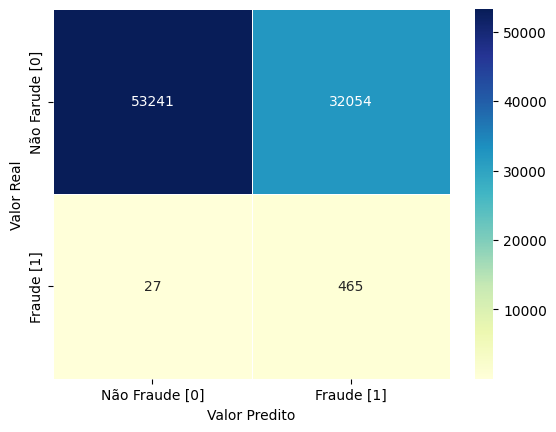

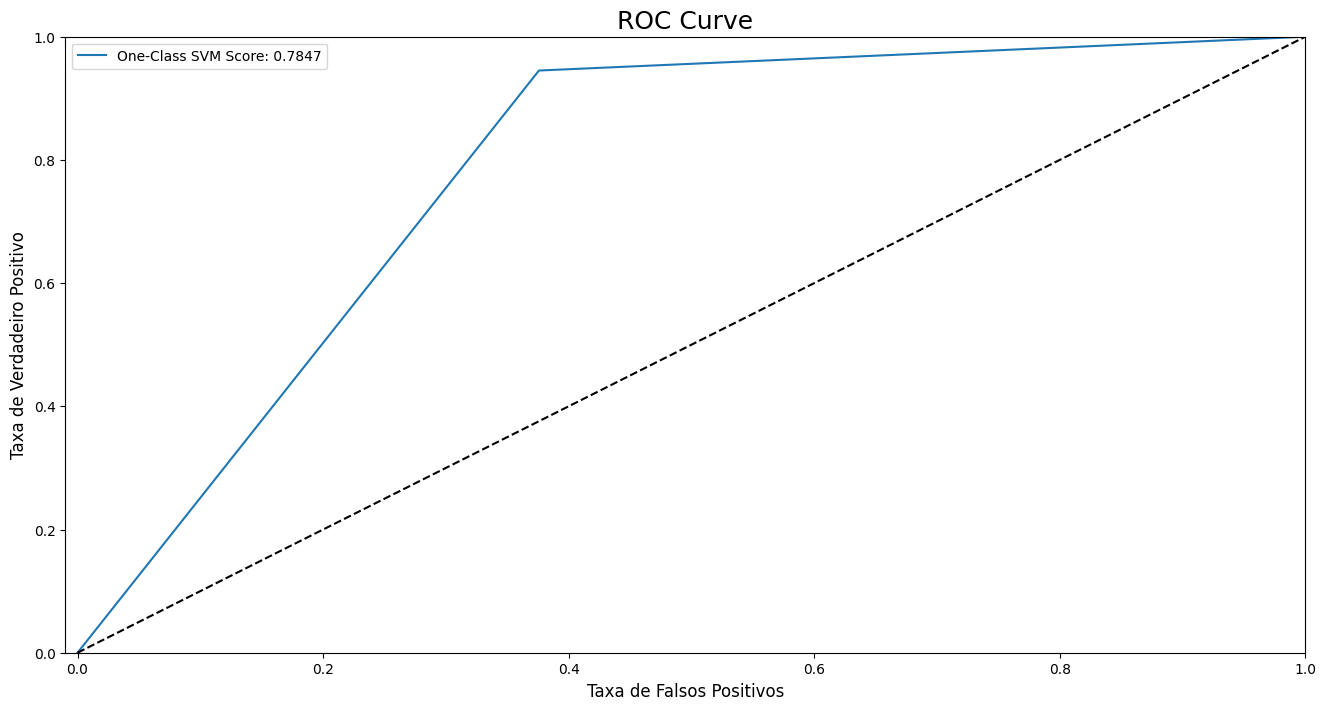

In [ ]:
#instaância e treinar modelo
clf = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)
clf.fit(X_train)

#Testar modelo
pred_one = clf.predict(X_test)

# Avaliar desempenho dos modelos
model_name = 'One-Class SVM'
print(f'Modelo {model_name}')

medir_performace(pred_one,y_test)
log_fpr, log_tpr, log_thresold = roc_curve(y_test, pred_one)
graph_roc_curve(log_fpr, log_tpr, y_test, pred_one, model_name)

###### **5.3.1 - One-Class SVM (Ajustado)**

Modelo One-Class SVM (Ajustado)
              precision    recall  f1-score   support

           0       1.00      0.62      0.77     85295
           1       0.01      0.95      0.03       492

    accuracy                           0.63     85787
   macro avg       0.51      0.78      0.40     85787
weighted avg       0.99      0.63      0.76     85787

Número total de erros: 32100
Accuracy: 0.626
f1_score: 0.028
Precisão: 0.014
Recall: 0.945
Model ROC: 0.7845487826324421


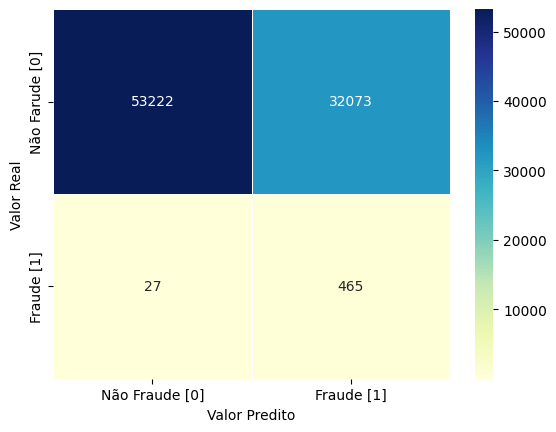

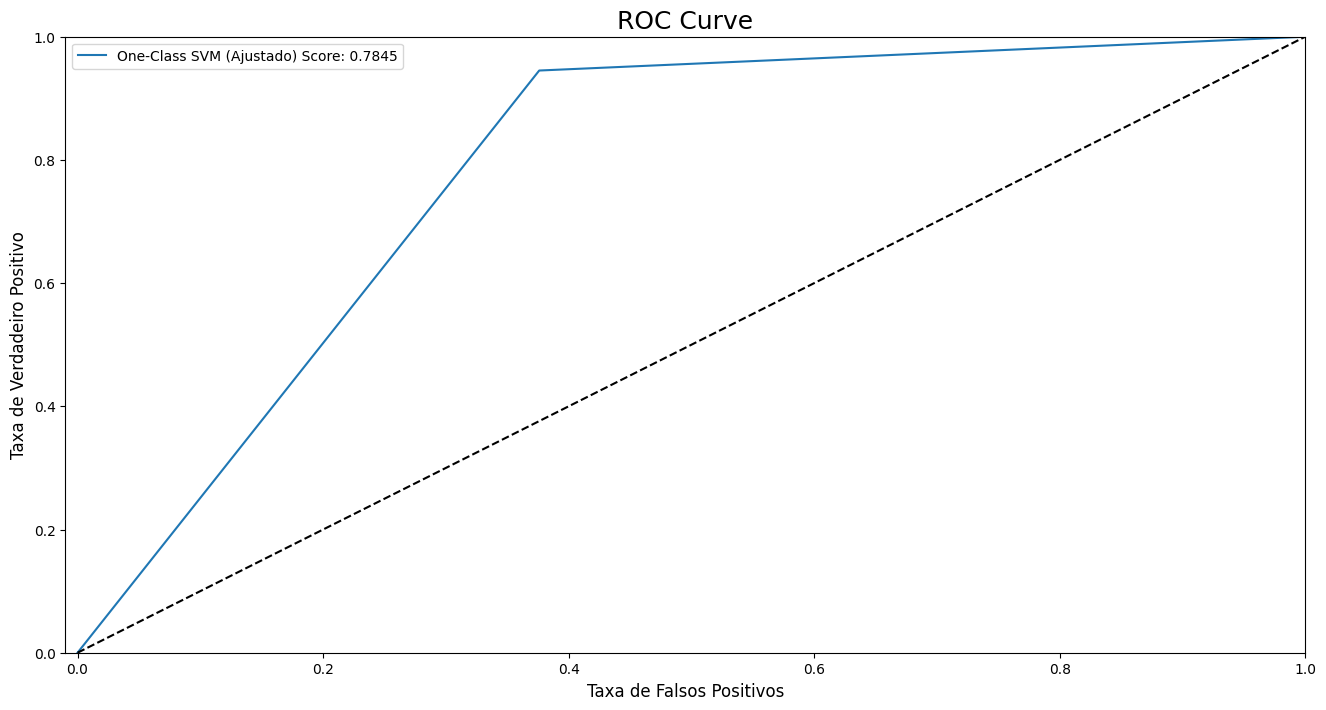

In [ ]:
#instância modelo
oneclass = svm.OneClassSVM()

list_gamma = np.arange(0.001, 3.0, 1.0)

parametros_grid = {'gamma': list_gamma,
                    'nu': [0.16, 0.1], 
                    'kernel': ['rbf','linear']}

#Definir f1_scorer
f1sc = make_scorer(f1_score, average='macro')

#Seleciona melhores parâmetros e treina modelo
newmodel = GridSearchCV(estimator=oneclass, param_grid=parametros_grid, cv=3, scoring=f1sc)
newmodel.fit(X_train)

#testa modelo
pred_one = newmodel.predict(X_test)

# Avaliar desempenho dos modelos
model_name = 'One-Class SVM (Ajustado)'
print(f'Modelo {model_name}')

medir_performace(pred_one,y_test)
log_fpr, log_tpr, log_thresold = roc_curve(y_test, pred_one)
graph_roc_curve(log_fpr, log_tpr, y_test, pred_one, model_name)

##### **5.4 - Model SVM**

In [9]:
#Separar o conjunto em dados e classe para treino e teste:
dados_train_svm = df.iloc[:,:-1]  #Entrada 
classes_train_svm = df['Class'] #Saída

#Separar o conjunto de dados para teste e treinamento - (70% treinamento) e (30% teste)
#Todas as transações são utilizadas para treinar o modelo svm*
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(dados_train_svm, classes_train_svm, test_size=0.30, random_state=42)

print("Tamanho do conjunto de treinamento:", X_train_svm.shape)
print("Tamanho do conjunto de teste :", X_test_svm.shape)

print("treinamento (Não-Fraudes):", len([x for x in y_train_svm if x is 0]))
print("treinamento (Fraudes):", len([x for x in y_train_svm if x is 1]))

Tamanho do conjunto de treinamento: (199364, 30)
Tamanho do conjunto de teste : (85443, 30)
treinamento (Não-Fraudes): 199008
treinamento (Fraudes): 356


###### 5.4.1 - Kernel Linear





Modelo SVM (kernel linear)
Model ROC: 0.665295
Precision-recall: 0.2137751215440005
[[85282    25]
 [   91    45]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.64      0.33      0.44       136

    accuracy                           1.00     85443
   macro avg       0.82      0.67      0.72     85443
weighted avg       1.00      1.00      1.00     85443



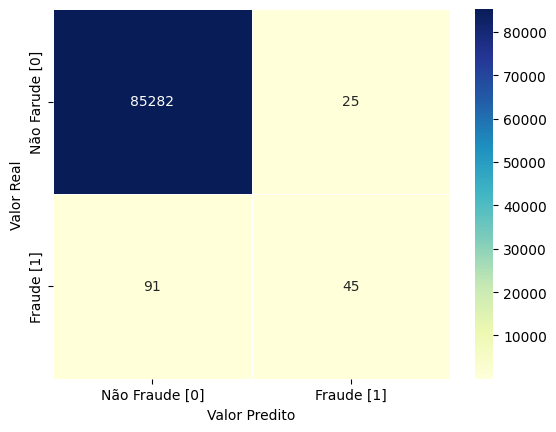

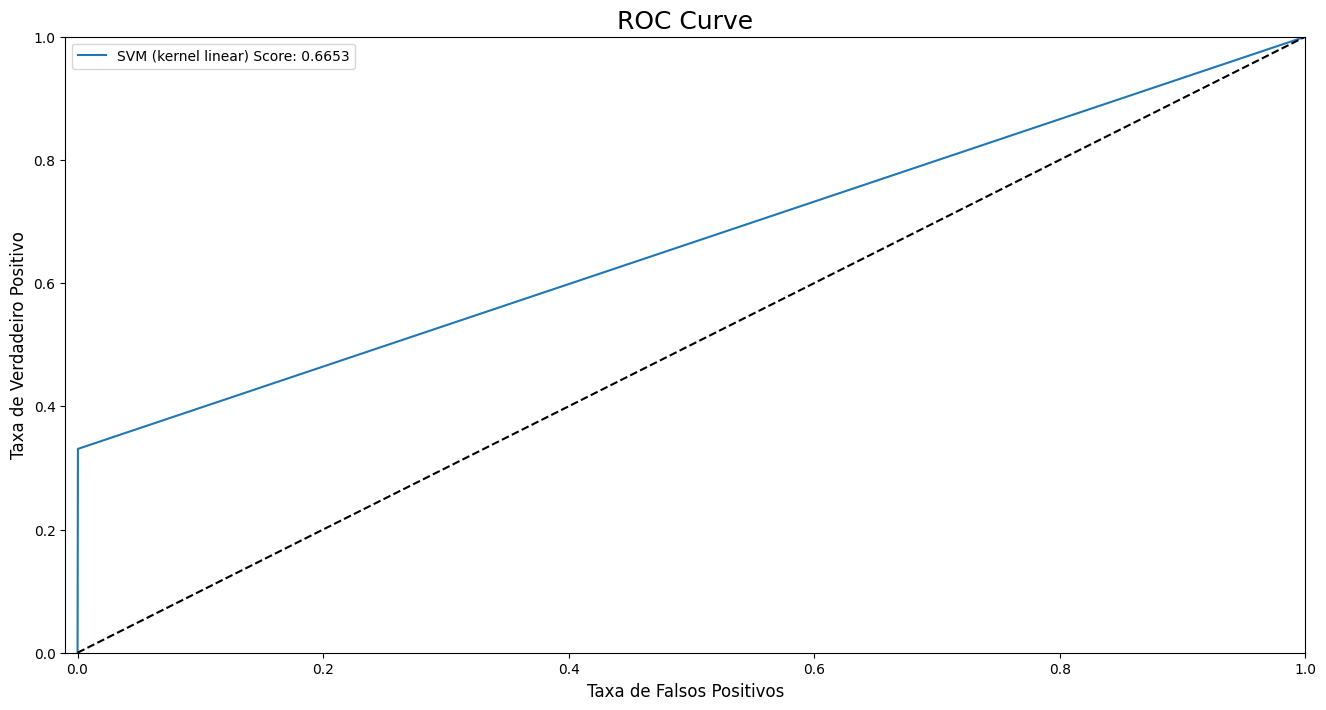

In [ ]:
#Criação do Classificador
clf = svm.SVC(kernel='linear', probability=True)

#Trainando o modelo
clf.fit(X_train_svm, y_train_svm)

#Previsão dada para o conjunto de dados de teste
pred_svm_linear = clf.predict(X_test_svm)

model_name = 'SVM (kernel linear)'
print(f'Modelo {model_name}')

con_mat = confusion_matrix(y_test_svm, pred_svm_linear)
average_precision = average_precision_score(y_test_svm, pred_svm_linear)
cls_report = classification_report(y_test_svm, pred_svm_linear)

#Imprime grafico - Matriz confusão
matrix = confusion_matrix(y_test_svm, pred_svm_linear)
sns.heatmap(pd.DataFrame(matrix, columns = ['Atual', 'Predição']),
    xticklabels=['Não Fraude [0]', 'Fraude [1]'], 
    yticklabels=['Não Farude [0]', 'Fraude [1]'], 
    annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
plt.xlabel('Valor Predito')
plt.ylabel('Valor Real')

print("Model ROC: %f" % (roc_auc_score(y_test_svm, pred_svm_linear)))
print("Precision-recall: {}".format(average_precision))
print(con_mat)
print(cls_report)

log_fpr, log_tpr, log_thresold = roc_curve(y_test_svm, pred_svm_linear)
graph_roc_curve(log_fpr, log_tpr, y_test_svm, pred_svm_linear, model_name)

###### 5.4.2 - Kernel RBF

Modelo SVM (kernel rbf)
Model ROC: 0.500000
Precision-recall: 0.0015917044111278865
[[85307     0]
 [  136     0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.00      0.00      0.00       136

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443



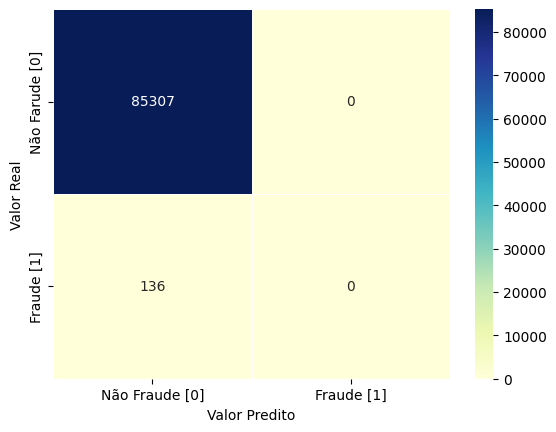

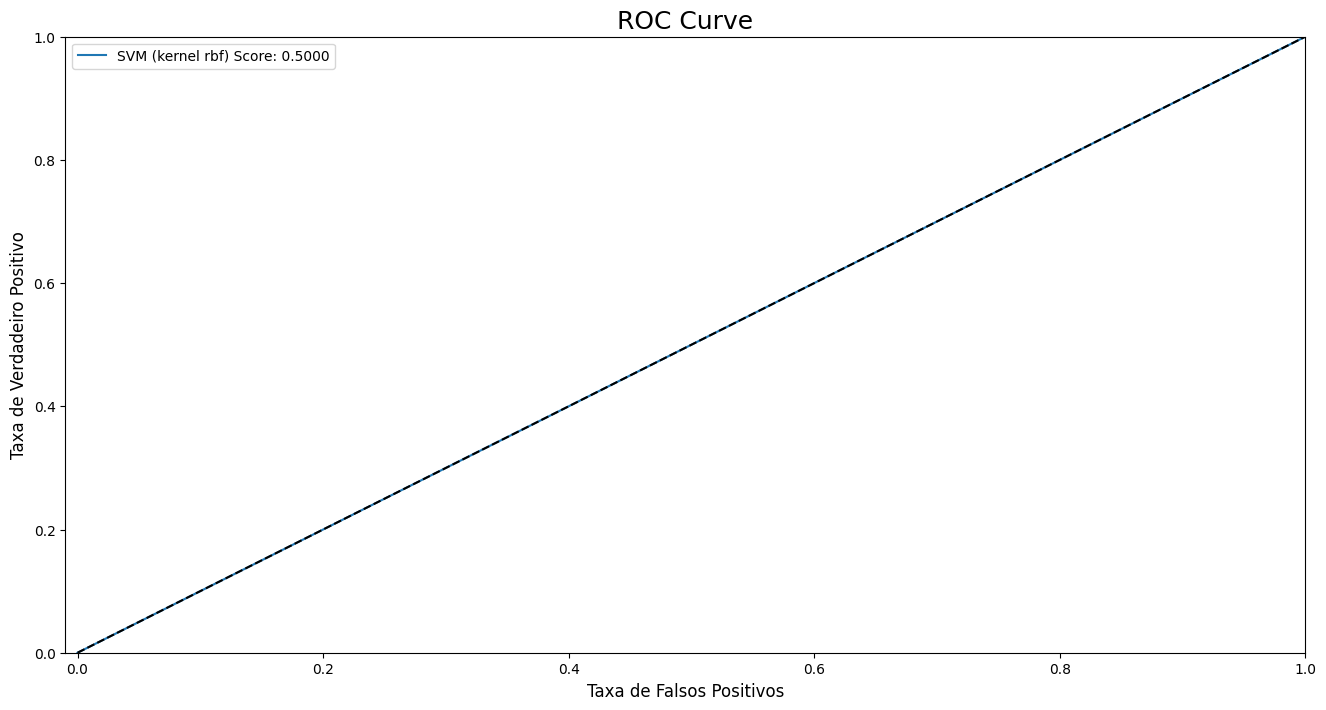

In [ ]:
#Criação do Classificador
clf = svm.SVC(kernel='rbf', probability=True)

#Trainando o modelo
clf.fit(X_train_svm, y_train_svm)

#Previsão dada para o conjunto de dados de teste
pred_svm_rbf = clf.predict(X_test_svm)

model_name = 'SVM (kernel rbf)'
print(f'Modelo {model_name}')

con_mat = confusion_matrix(y_test_svm, pred_svm_rbf)
average_precision = average_precision_score(y_test_svm, pred_svm_rbf)
cls_report = classification_report(y_test_svm, pred_svm_rbf)

#Imprime grafico - Matriz confusão
matrix = confusion_matrix(y_test_svm, pred_svm_rbf)
sns.heatmap(pd.DataFrame(matrix, columns = ['Atual', 'Predição']),
    xticklabels=['Não Fraude [0]', 'Fraude [1]'], 
    yticklabels=['Não Farude [0]', 'Fraude [1]'], 
    annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
plt.xlabel('Valor Predito')
plt.ylabel('Valor Real')

print("Model ROC: %f" % (roc_auc_score(y_test_svm, pred_svm_rbf)))
print("Precision-recall: {}".format(average_precision))
print(con_mat)
print(cls_report)

log_fpr, log_tpr, log_thresold = roc_curve(y_test_svm, pred_svm_rbf)
graph_roc_curve(log_fpr, log_tpr, y_test_svm, pred_svm_rbf, model_name)

# 6. Aplica técnicas de Balanceamento

Esse conjunto de dados é muito desbalanceado, o que significa que usar os dados como estão pode resultar em comportamento indesejado de um classificador supervisionado como o SVM. Como pode ser visto nos teste realizados como SVM no tópico 5.4, quando o classificador treinou com esse conjunto de dados tentando obter a melhor precisão possível, ele rotulou todas as transações como não-fraude. Para resolver problemas como este técnicas de balanceamento de dados podem ser aplicadas. Neste trabalho iremos aplicar as seguintes técnicas:

 1. Random Undersampling
 1. OverSampled SMOTE

### 1. Random Underampling


In [10]:
#Vamos embaralhar os dados antes de criar as subamostras
df_mix  = df.sample(frac=1, random_state=42)

#quantidade de trasações fraudulentas 492 
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

#Embaralhar as linhas do dataframe
under_df = normal_distributed_df.sample(frac=1, random_state=42)

#Mostrar quantidade transações: válidas e anomalas:
print("Transações Válidas: ",  under_df[under_df['Class'] == 1].shape)
print("Transações Fraudulentas: ", under_df[under_df['Class'] == 0].shape)

Transações Válidas:  (492, 31)
Transações Fraudulentas:  (492, 31)


Text(0.5, 0, '0: Não-Fraude  1:Fraude')

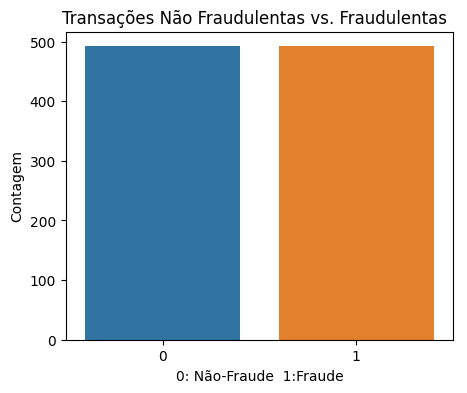

In [ ]:
#Mostrando a Distribuição dos dados agrupados por class após o balanceamento:
counts = under_df['Class'].value_counts()

plt.style.use('default')
plt.figure(figsize=(5,4))
sns.barplot(x=counts.index, y=counts)
plt.title('Transações Não Fraudulentas vs. Fraudulentas  ')
plt.ylabel('Contagem')
plt.xlabel('0: Não-Fraude  1:Fraude')

### 2. Oversample SMOTE

In [11]:
# Oversampling with 1:1 ratio of legal and fraud transactions
frauds = len(df[df['Class'] == 0])
fraud_indices = df[df.Class == 1].index
random_indices = np.random.choice(fraud_indices,frauds, replace=True)
fraud_indices = df[df.Class == 0].index
df_over_sample_indices = np.concatenate([fraud_indices,random_indices])
df_over_sample = df.loc[df_over_sample_indices]

#Embaralhe as linhas do dataframe:
smote_df = df_over_sample.sample(frac=1, random_state=42)

#Mostrar quantidade transações: válidas e anomalas:
print("Transações Válidas:",  smote_df[smote_df['Class'] == 1].shape)
print("Transações Fraudulentas:", smote_df[smote_df['Class'] == 0].shape)

Transações Válidas: (284315, 31)
Transações Fraudulentas: (284315, 31)


Text(0.5, 0, '0: Não-Fraude  1:Fraude')

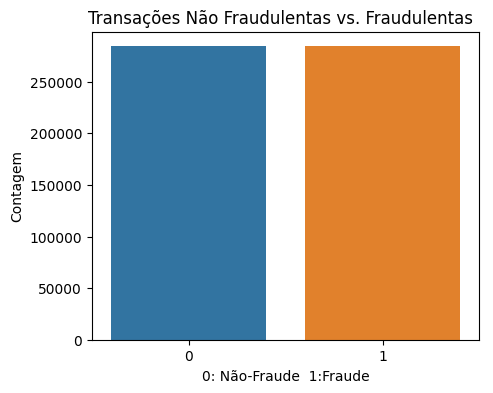

In [12]:
#Mostrando a Distribuição dos dados agrupados por class após o balanceamento:
counts = smote_df['Class'].value_counts()

plt.style.use('default')
plt.figure(figsize=(5,4))
sns.barplot(x=counts.index, y=counts)
plt.title('Transações Não Fraudulentas vs. Fraudulentas  ')
plt.ylabel('Contagem')
plt.xlabel('0: Não-Fraude  1:Fraude')

### 3. Treinar Modelos

##### 3.1 Model SVM com Underampling

In [ ]:
#Separar o conjunto em dados e classe para treino e teste:
dados_train_under = under_df.iloc[:,:-1]  #Entrada 
classes_train_under = under_df['Class'] #Saída

fraud_df = df.loc[df['Class'] == 1]

#Separar o conjunto de dados para teste e treinamento - (70% treinamento) e (30% teste)
#Todas as transações são utilizadas para treinar o modelo svm*
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(dados_train_under, classes_train_under, test_size=0.30, random_state=42)

print("Tamanho do conjunto de treinamento:", X_train_balanced.shape)
print("treinamento (Não-Fraudes):", len([x for x in y_train_balanced if x is 0]))
print("treinamento (Fraudes):", len([x for x in y_train_balanced if x is 1]))

print("Tamanho do conjunto de teste :", X_test_balanced.shape)

Tamanho do conjunto de treinamento: (688, 30)
treinamento (Não-Fraudes): 358
treinamento (Fraudes): 330
Tamanho do conjunto de teste : (296, 30)


Modelo SVM (kernel linear)
Model ROC: 0.996914
Precision-recall: 0.9972055388722055
[[134   0]
 [  1 161]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       134
           1       1.00      0.99      1.00       162

    accuracy                           1.00       296
   macro avg       1.00      1.00      1.00       296
weighted avg       1.00      1.00      1.00       296



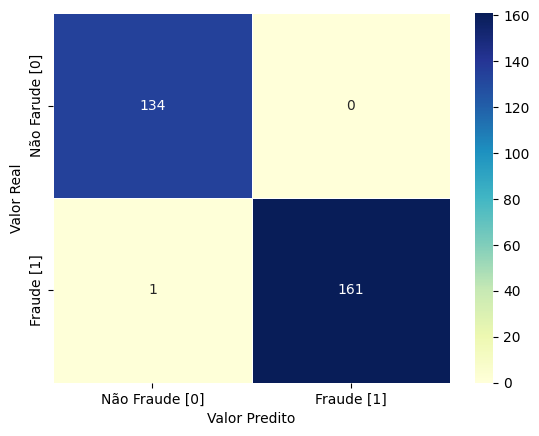

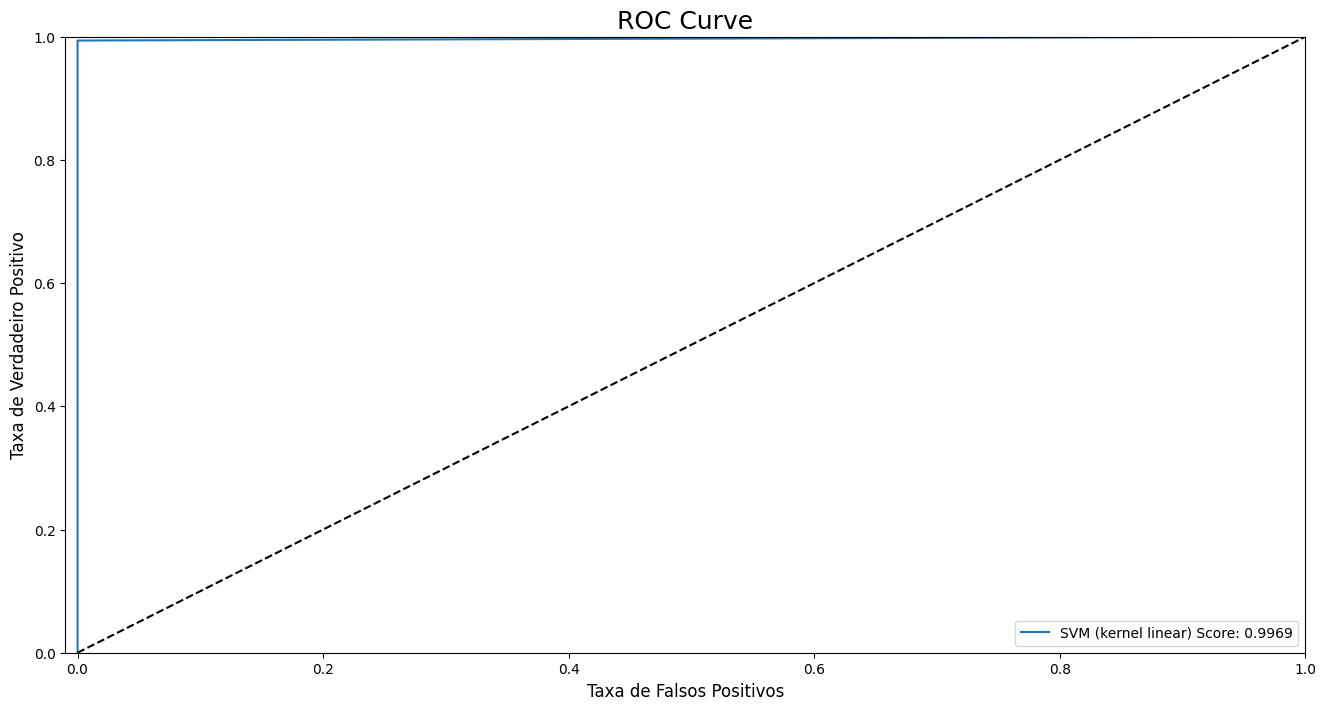

In [ ]:
#Rodar modelo SVM

#Criação do Classificador
clf = svm.SVC(kernel='linear', probability=True)

#Trainando o modelo
clf.fit(X_train_balanced, y_train_balanced)

#Previsão dada para o conjunto de dados de teste
pred_svm_linear = clf.predict(X_test_balanced)

model_name = 'SVM (kernel linear)'
print(f'Modelo {model_name}')

con_mat = confusion_matrix(y_test_balanced, pred_svm_linear)
average_precision = average_precision_score(y_test_balanced, pred_svm_linear)
cls_report = classification_report(y_test_balanced, pred_svm_linear)

print("Model ROC: %f" % (roc_auc_score(y_test_balanced, pred_svm_linear)))
print("Precision-recall: {}".format(average_precision))
print(con_mat)
print(cls_report)

#Imprime grafico - Matriz confusão
matrix = confusion_matrix(y_test_balanced, pred_svm_linear)
sns.heatmap(pd.DataFrame(matrix, columns = ['Atual', 'Predição']),
    xticklabels=['Não Fraude [0]', 'Fraude [1]'], 
    yticklabels=['Não Farude [0]', 'Fraude [1]'], 
    annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
plt.xlabel('Valor Predito')
plt.ylabel('Valor Real')

log_fpr, log_tpr, log_thresold = roc_curve(y_test_balanced, pred_svm_linear)
graph_roc_curve(log_fpr, log_tpr, y_test_balanced, pred_svm_linear, model_name)


Modelo SVM (kernel RBF)
Model ROC: 0.978395
Precision-recall: 0.9804387721054388
[[134   0]
 [  7 155]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       134
           1       1.00      0.96      0.98       162

    accuracy                           0.98       296
   macro avg       0.98      0.98      0.98       296
weighted avg       0.98      0.98      0.98       296



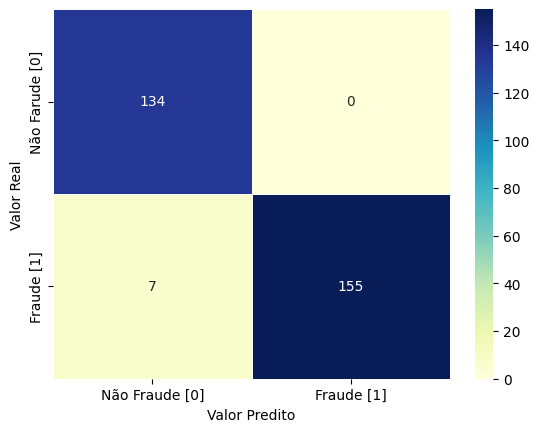

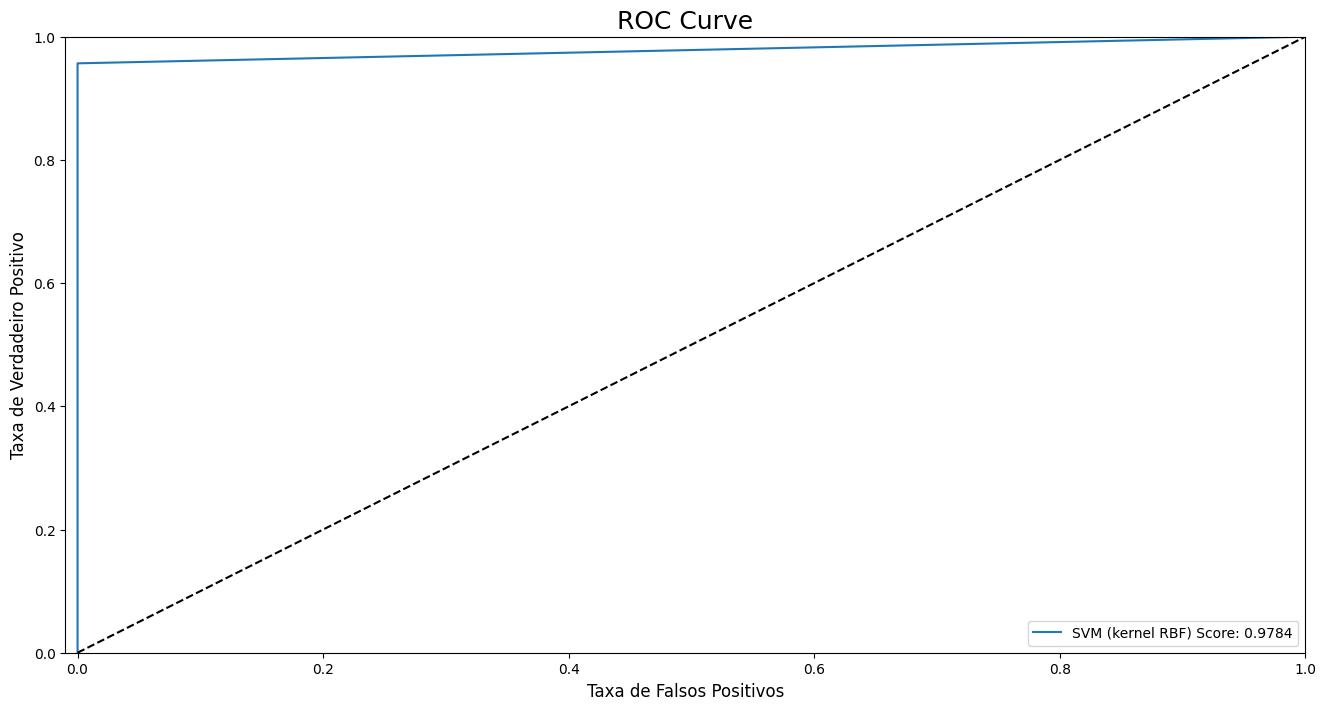

In [ ]:
#Separar o conjunto em dados e classe para treino e teste:
dados_train_under = under_df.iloc[:,:-1]  #Entrada 
classes_train_under = under_df['Class'] #Saída

#Separar o conjunto de dados para teste e treinamento - (70% treinamento) e (30% teste)
#Todas as transações são utilizadas para treinar o modelo svm*
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(dados_train_under, classes_train_under, test_size=0.30, random_state=42)
#Roda modelo SVM

#Criação do Classificador
clf = svm.SVC(kernel='rbf', probability=True)

#Trainando o modelo
clf.fit(X_train_balanced, y_train_balanced)

#Previsão dada para o conjunto de dados de teste
pred_svm_rbf = clf.predict(X_test_balanced)

model_name = 'SVM (kernel RBF)'
print(f'Modelo {model_name}')

con_mat = confusion_matrix(y_test_balanced, pred_svm_rbf)
average_precision = average_precision_score(y_test_balanced, pred_svm_rbf)
cls_report = classification_report(y_test_balanced, pred_svm_rbf)

print("Model ROC: %f" % (roc_auc_score(y_test_balanced, pred_svm_rbf)))
print("Precision-recall: {}".format(average_precision))
print(con_mat)
print(cls_report)

#Imprime grafico - Matriz confusão
matrix = confusion_matrix(y_test_balanced, pred_svm_rbf)
sns.heatmap(pd.DataFrame(matrix, columns = ['Atual', 'Predição']),
    xticklabels=['Não Fraude [0]', 'Fraude [1]'], 
    yticklabels=['Não Farude [0]', 'Fraude [1]'], 
    annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
plt.xlabel('Valor Predito')
plt.ylabel('Valor Real')

log_fpr, log_tpr, log_thresold = roc_curve(y_test_balanced, pred_svm_rbf)
graph_roc_curve(log_fpr, log_tpr, y_test_balanced, pred_svm_rbf, model_name)

##### 3.2 Model SVM com  Oversample SMOTE

In [13]:
#Separar o conjunto em dados e classe para treino e teste:
dados_train_smote = smote_df.iloc[:,:-1]  #Entrada 
classes_train_smote = smote_df['Class'] #Saída

#Separar o conjunto de dados para teste e treinamento - (70% treinamento) e (30% teste)
#Todas as transações são utilizadas para treinar o modelo svm*
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(dados_train_smote, classes_train_smote, test_size=0.30, random_state=42)

print("Tamanho do conjunto de treinamento:", X_train_balanced.shape)
print("treinamento (Não-Fraudes):", len([x for x in y_train_balanced if x is 0]))
print("treinamento (Fraudes):", len([x for x in y_train_balanced if x is 1]))

print("Tamanho do conjunto de teste :", X_test_balanced.shape)

Tamanho do conjunto de treinamento: (398041, 30)
treinamento (Não-Fraudes): 198724
treinamento (Fraudes): 199317
Tamanho do conjunto de teste : (170589, 30)


In [ ]:

#Roda modelo SVM

#Criação do Classificador
clf = svm.SVC(kernel='linear', probability=True)

#Trainando o modelo
clf.fit(X_train_balanced, y_train_balanced)

#Previsão dada para o conjunto de dados de teste
pred_svm_linear = clf.predict(X_test_balanced)

model_name = 'SVM (kernel linear)'
print(f'Modelo {model_name}')

con_mat = confusion_matrix(y_test_balanced, pred_svm_linear)
average_precision = average_precision_score(y_test_balanced, pred_svm_linear)
cls_report = classification_report(y_test_balanced, pred_svm_linear)

print("Model ROC: %f" % (roc_auc_score(y_test_balanced, pred_svm_linear)))
print("Precision-recall: {}".format(average_precision))
print(con_mat)
print(cls_report)

#Imprime grafico - Matriz confusão
matrix = confusion_matrix(y_test_balanced, pred_svm_linear)
sns.heatmap(pd.DataFrame(matrix, columns = ['Atual', 'Predição']),
    xticklabels=['Não Fraude [0]', 'Fraude [1]'], 
    yticklabels=['Não Farude [0]', 'Fraude [1]'], 
    annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
plt.xlabel('Valor Predito')
plt.ylabel('Valor Real')

log_fpr, log_tpr, log_thresold = roc_curve(y_test_balanced, pred_svm_linear)
graph_roc_curve(log_fpr, log_tpr, y_test_balanced, pred_svm_linear, model_name)
